<a href="https://colab.research.google.com/github/R-Kani/Artefak_TA_1301213269/blob/main/stacked_rfknn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library and import dataset

In [ ]:
# Import the necessary libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support

In [ ]:
# Clone the GitHub repository
!git clone https://github.com/R-Kani/DS-Stunting.git

Cloning into 'DS-Stunting'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 6), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 466.12 KiB | 3.35 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [ ]:
# Read csv
df = pd.read_csv('/content/DS-Stunting/bandarharjo.csv')
df.head()

,No Anak,JK,Tgl Lahir,BB Lahir,TB Lahir,Prov,Kab/Kota,Kec,Pukesmas,Desa/Kel,...,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,KEK,TIDAK KEK,JML,ANEMIA,TIDAK ANEMIA,JML.1
0,1,P,2024-01-08,2,45,JAWA TENGAH,SEMARANG,SEMARANG UTARA,BANDARHARJO,BANDARHARJO,...,-2.50,Gizi Baik,-0.94,N,0,1,1,0,1,1
1,2,P,2019-02-06,2.8,49,JAWA TENGAH,SEMARANG,SEMARANG UTARA,BANDARHARJO,TANJUNGMAS,...,-1.35,Gizi Baik,0.78,N,0,0,0,0,0,0
2,3,L,2019-02-20,2.9,49,JAWA TENGAH,SEMARANG,SEMARANG UTARA,BANDARHARJO,TANJUNGMAS,...,-1.67,Gizi Lebih,2.01,N,0,0,0,0,0,0
3,4,P,2019-02-27,2.8,49,JAWA TENGAH,SEMARANG,SEMARANG UTARA,BANDARHARJO,TANJUNGMAS,...,-1.47,Gizi Baik,-0.97,N,0,0,0,0,0,0
4,5,P,2019-03-04,2.8,49,JAWA TENGAH,SEMARANG,SEMARANG UTARA,BANDARHARJO,TANJUNGMAS,...,-1.80,Gizi Lebih,2.15,N,0,0,0,0,0,0


In [ ]:
df.tail()

,No Anak,JK,Tgl Lahir,BB Lahir,TB Lahir,Prov,Kab/Kota,Kec,Pukesmas,Desa/Kel,...,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,KEK,TIDAK KEK,JML,ANEMIA,TIDAK ANEMIA,JML.1
3782,3783,P,2024-02-14,3,50,JAWA TENGAH,SEMARANG,SEMARANG UTARA,BANDARHARJO,BANDARHARJO,...,-0.43,Gizi Baik,-1.74,-,0,0,0,0,0,0
3783,3784,P,2024-02-14,3.4,50,JAWA TENGAH,SEMARANG,SEMARANG UTARA,BANDARHARJO,TANJUNGMAS,...,-0.43,Gizi Baik,-0.32,-,0,0,0,0,0,0
3784,3785,L,2024-02-06,3.5,49,JAWA TENGAH,SEMARANG,SEMARANG UTARA,BANDARHARJO,DADAPSARI,...,-0.65,Gizi Baik,0.76,-,0,0,0,0,0,0
3785,3786,L,2024-02-20,3.5,50,JAWA TENGAH,SEMARANG,SEMARANG UTARA,BANDARHARJO,BANDARHARJO,...,0.06,Gizi Baik,0.56,-,0,0,0,0,0,0
3786,3787,P,2024-02-16,3.1,49,JAWA TENGAH,SEMARANG,SEMARANG UTARA,BANDARHARJO,TANJUNGMAS,...,-1.09,Gizi Baik,-0.67,-,0,0,0,0,0,0


# Data PreProcessing



*   Check for missing values
*   Feature Selection
*   Data Visualization and handling
*   Data Split and Oversampling



In [ ]:
# Check NaN values of the whole df, return True if one of the features contains a missing value
df.isna().any().any()

False

In [ ]:
# Feature Selection
# Column 'No Anak' will be drop because indexing is not needed
df.drop('No Anak', axis=1, inplace=True)

# Column 'Tanggal Pengukuran', 'Tgl Lahir' will be drop because is redundant when there is 'Usia Saat Ukur' feature
df.drop('Tanggal Pengukuran', axis=1, inplace=True)
df.drop('Tgl Lahir', axis=1, inplace=True)

# Column 'BB Lahir', 'TB Lahir' will be drop because it does not concern stunting data
df.drop('BB Lahir', axis=1, inplace=True)
df.drop('TB Lahir', axis=1, inplace=True)

# Column 'Prov', 'Kab/Kota', 'Kec','Pukesmas', 'Desa/Kel' will be drop because the values the same for each row
df.drop('Prov', axis=1, inplace=True)
df.drop('Kab/Kota', axis=1, inplace=True)
df.drop('Kec', axis=1, inplace=True)
df.drop('Pukesmas', axis=1, inplace=True)
df.drop('Desa/Kel', axis=1, inplace=True)

# Column 'Naik Berat Badan', 'ANEMIA', 'KEK', 'TIDAK KEK', 'TIDAK ANEMIA', 'JML', 'JML.1' will be drop because there is too much noise
df.drop('Naik Berat Badan', axis=1, inplace=True)
df.drop('ANEMIA', axis=1, inplace=True)
df.drop('KEK', axis=1, inplace=True)
df.drop('TIDAK KEK', axis=1, inplace=True)
df.drop('TIDAK ANEMIA', axis=1, inplace=True)
df.drop('JML', axis=1, inplace=True)
df.drop('JML.1', axis=1, inplace=True)

In [ ]:
# Rename all columns
df.rename(columns={
    'JK': 'Gender',
    'Usia Saat Ukur': 'Age_at_measurement',
    'Berat': 'Weight',
    'Tinggi': 'Height',
    'BB/U': 'Weight/Age',
    'TB/U': 'Height/Age',
    'BB/TB': 'Weight/Height',
    'ZS BB/U': 'ZS_Weight/Age',
    'ZS TB/U': 'ZS_Height/Age',
    'ZS BB/TB': 'ZS_Weight/Height'
    }, inplace=True)


df['Gender'] = df['Gender'].str.strip().map({'L': 'M', 'P': 'F'})

df['Weight/Age'] = df['Weight/Age'].map({
    'Sangat Kurang': 'Severely Underweight',
    'Kurang': 'Underweight',
    'Berat Badan Normal': 'Normal',
    'Risiko Lebih': 'Risk of OverWeight'
})

df['Weight/Height'] = df['Weight/Height'].map({
    'Gizi Buruk': 'Severely Wasted',
    'Gizi Kurang': 'Wasted',
    'Gizi Baik': 'Normal',
    'Risiko Gizi Lebih': 'Risk of Overweight',
    'Gizi Lebih': 'Overweight',
    'Obesitas': 'Obese'
})

df['Height/Age'] = df['Height/Age'].map({
    'Normal': 'Normal',
    'Pendek': 'Stunted',
    'Sangat Pendek': 'Severely Stunted'
})

df['Age_at_measurement'] = df['Age_at_measurement'].str.replace('Tahun', 'Year').str.replace('Bulan', 'Month').str.replace('Hari', 'Day')

In [ ]:
# Check the renamed DF
df.head()

,Gender,Age_at_measurement,Weight,Height,Weight/Age,ZS_Weight/Age,Height/Age,ZS_Height/Age,Weight/Height,ZS_Weight/Height
0,F,0 Year - 1 Month - 11 Day,3.1,50.1,Underweight,-2.84,Stunted,-2.50,Normal,-0.94
1,F,4 Year - 11 Month - 25 Day,17.3,102.9,Normal,-0.34,Normal,-1.35,Normal,0.78
2,M,4 Year - 11 Month - 11 Day,18.9,101.9,Normal,0.27,Normal,-1.67,Overweight,2.01
3,F,4 Year - 11 Month - 4 Day,14.5,102.0,Normal,-1.55,Normal,-1.47,Normal,-0.97
4,F,4 Year - 10 Month - 29 Day,18.8,100.4,Normal,0.28,Normal,-1.80,Overweight,2.15


In [ ]:
# Change the format of the 'Age_at_measurement' feature to months
def convert_to_months(age_str):
    pattern = r'(\d+)\s*Year\s*-\s*(\d+)\s*Month\s*-\s*(\d+)\s*Day'
    match = re.match(pattern, age_str)

    if match:
        years = int(match.group(1))
        months = int(match.group(2))
        days = int(match.group(3))

        total_months = years * 12 + months
        return total_months
    else:
        return None

# Apply the function to the 'Measurement_Age' column
df['Age_at_measurement'] = df['Age_at_measurement'].apply(convert_to_months)

In [ ]:
# Encoding 'Gender' feature
df['Gender'] = df['Gender'].str.strip().map({'M': 0, 'F': 1})

# Encoding 'Weight/Age' feature
df['Weight/Age'] = df['Weight/Age'].map({
    'Severely Underweight': 0,
    'Underweight': 1,
    'Normal': 2,
    'Risk of OverWeight': 3
})

# Encoding 'Weight/Height' feature
df['Weight/Height'] = df['Weight/Height'].map({
    'Severely Wasted': 0,
    'Wasted': 1,
    'Normal': 2,
    'Risk of Overweight': 3,
    'Overweight': 4,
    'Obese': 5
})

# Encoding 'Height/Age' feature
df['Height/Age'] = df['Height/Age'].map({
    'Normal': 0,
    'Stunted': 1,
    'Severely Stunted': 1
})


In [ ]:
df.head()

,Gender,Age_at_measurement,Weight,Height,Weight/Age,ZS_Weight/Age,Height/Age,ZS_Height/Age,Weight/Height,ZS_Weight/Height
0,1,1,3.1,50.1,1,-2.84,1,-2.50,2,-0.94
1,1,59,17.3,102.9,2,-0.34,0,-1.35,2,0.78
2,0,59,18.9,101.9,2,0.27,0,-1.67,4,2.01
3,1,59,14.5,102.0,2,-1.55,0,-1.47,2,-0.97
4,1,58,18.8,100.4,2,0.28,0,-1.80,4,2.15


In [ ]:
df.describe()

,Gender,Age_at_measurement,Weight,Height,Weight/Age,ZS_Weight/Age,Height/Age,ZS_Height/Age,Weight/Height,ZS_Weight/Height
count,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000
mean,0.452601,30.529443,12.143948,85.947557,1.993663,-0.538392,0.040929,-1.013908,2.195669,0.062942
std,0.497814,17.736177,3.976237,14.360416,0.385229,1.019976,0.198153,0.907834,0.607231,1.135570
min,0.000000,0.000000,2.570000,47.000000,0.000000,-3.940000,0.000000,-4.270000,0.000000,-3.590000
25%,0.000000,14.000000,9.165000,75.000000,2.000000,-1.180000,0.000000,-1.700000,2.000000,-0.720000
50%,0.000000,32.000000,12.250000,88.900000,2.000000,-0.600000,0.000000,-1.160000,2.000000,0.020000
75%,1.000000,46.000000,14.600000,97.400000,2.000000,0.020000,0.000000,-0.450000,2.000000,0.700000
max,1.000000,60.000000,31.600000,117.400000,3.000000,4.590000,1.000000,2.670000,5.000000,5.950000


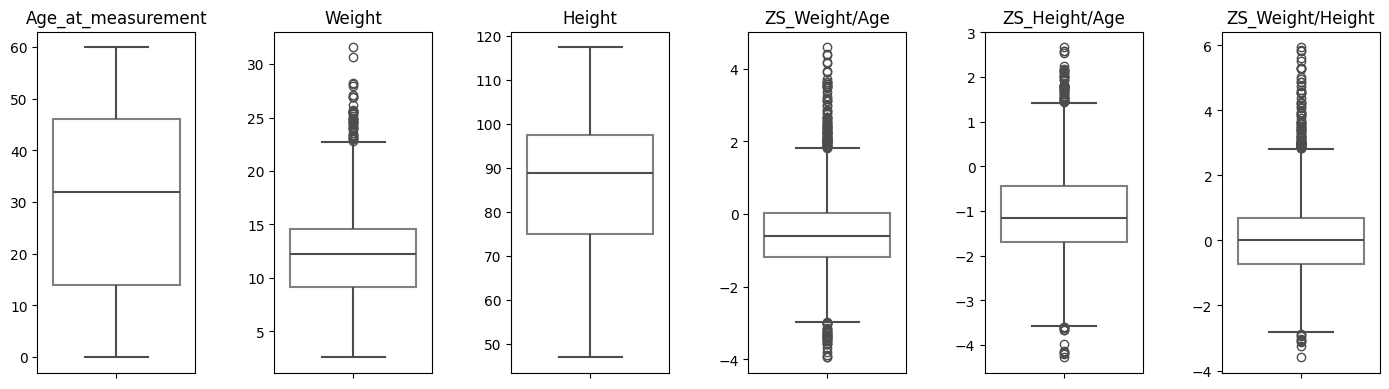

In [ ]:
# Plotting box plots for each numerical feature
features = ['Age_at_measurement', 'Weight', 'Height', 'ZS_Weight/Age', 'ZS_Height/Age', 'ZS_Weight/Height']

plt.figure(figsize=(14, 4))

for i, feature in enumerate(features, 1):
    ax = plt.subplot(1, 6, i)
    sns.boxplot(y=df[feature], linewidth=1.5, color='grey', boxprops=dict(edgecolor='grey', facecolor='none'), ax=ax)
    ax.set_title(feature)
    ax.set_ylabel('')

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

In [ ]:
# Based on the boxplot the extreme outliers of features will be replace with the median
df['Weight'] = df['Weight'].apply(lambda x: df['Weight'].median() if x > 30 else x)
df['ZS_Weight/Age'] = df['ZS_Weight/Age'].apply(lambda x: df['ZS_Weight/Age'].median() if x > 4 else x)
df['ZS_Height/Age'] = df['ZS_Height/Age'].apply(lambda x:  df['ZS_Height/Age'].median() if x > 4 else x)
df['ZS_Weight/Height'] = df['ZS_Weight/Height'].apply(lambda x: df['ZS_Weight/Height'].median() if x > 4 else x)

# The rest will use winsorization by capping their values
df['Weight'] = winsorize(df['Weight'], limits=[0.05, 0.05])
df['ZS_Weight/Age'] = winsorize(df['ZS_Weight/Age'], limits=[0.05, 0.05])
df['ZS_Height/Age'] = winsorize(df['ZS_Height/Age'], limits=[0.05, 0.05])
df['ZS_Weight/Height'] = winsorize(df['ZS_Weight/Height'], limits=[0.05, 0.05])

# Standardize some features with large numbers so they are on the same scale
col_to_scale = ['Age_at_measurement', 'Weight', 'Height', 'ZS_Weight/Age', 'ZS_Height/Age', 'ZS_Weight/Height']

# Apply MinMaxScaler to the specified columns
df[col_to_scale] = MinMaxScaler().fit_transform(df[col_to_scale])

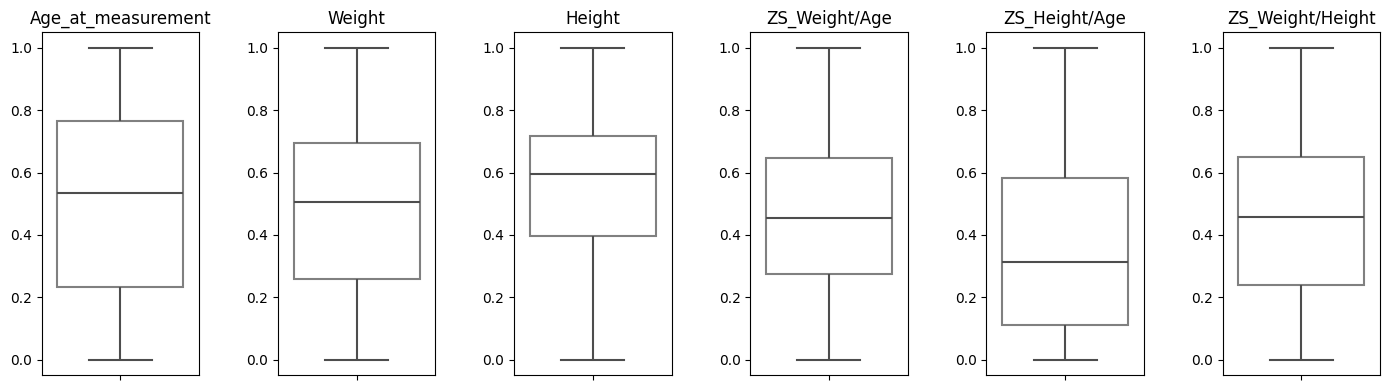

In [ ]:
# Check the box plot again after Handling Outliers and MinMax Scaling
features = ['Age_at_measurement', 'Weight', 'Height', 'ZS_Weight/Age', 'ZS_Height/Age', 'ZS_Weight/Height']

plt.figure(figsize=(14, 4))

for i, feature in enumerate(features, 1):
    ax = plt.subplot(1, 6, i)
    sns.boxplot(y=df[feature], linewidth=1.5, color='grey', boxprops=dict(edgecolor='grey', facecolor='none'), ax=ax)
    ax.set_title(feature)
    ax.set_ylabel('')

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

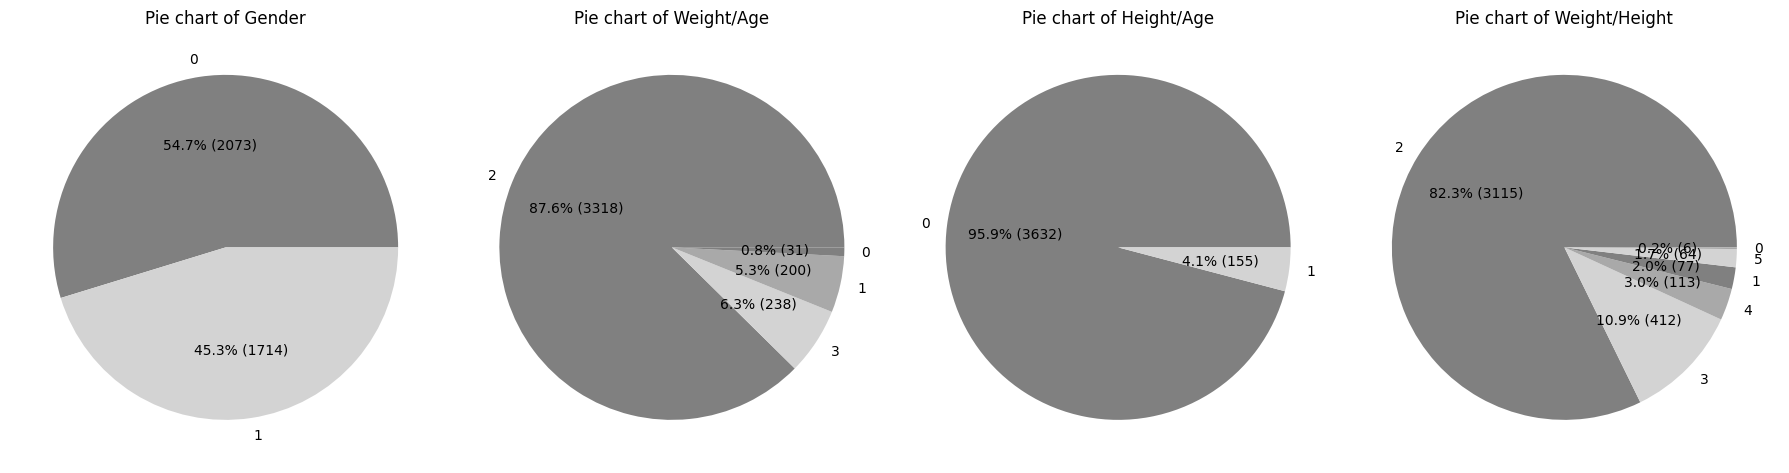

In [ ]:
# Plot the categorical features using a pie chart
features = ['Gender', 'Weight/Age', 'Height/Age','Weight/Height']
plt.figure(figsize=(18, 12))

def format_label(pct, allvals):
    absolute = int(np.round(pct / 100. * sum(allvals)))
    return f'{pct:.1f}% ({absolute})'

for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i + 4)
    feature_counts = df[feature].value_counts()
    plt.pie(feature_counts,
            labels=feature_counts.index,
            autopct=lambda pct: format_label(pct, feature_counts),
            colors=['grey', 'lightgrey', 'darkgrey'])
    plt.title(f'Pie chart of {feature}')

plt.tight_layout()
plt.show()

# Evaluation

In [ ]:
df.head()

,Gender,Age_at_measurement,Weight,Height,Weight/Age,ZS_Weight/Age,Height/Age,ZS_Height/Age,Weight/Height,ZS_Weight/Height
0,1,0.016667,0.000000,0.044034,1,0.000000,1,0.000000,2,0.175953
1,1,0.983333,0.911717,0.794034,2,0.535604,0,0.242424,2,0.680352
2,0,0.983333,1.000000,0.779830,2,0.724458,0,0.121212,4,1.000000
3,1,0.983333,0.686998,0.781250,2,0.160991,0,0.196970,2,0.167155
4,1,0.966667,1.000000,0.758523,2,0.727554,0,0.071970,4,1.000000


In [ ]:
# Split the data into features and target
X = df.drop(columns=['Height/Age'])
y = df['Height/Age']

# Split data into training and test sets with 70% data train and 30% data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize SMOTE and RandomUnderSampler
smote = SMOTE(random_state=42)
# Apply the hybrid resampling to balance the dataset
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
y_train_res.describe()

,Height/Age
count,5096.000000
mean,0.500000
std,0.500049
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [ ]:
# Function to display evaluation metrics
def display_evaluation_metrics(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
    print(f"\nAccuracy\t: {accuracy*100:.2f}%")
    print(f"Precision\t: {precision*100:.2f}%")
    print(f"Recall\t\t: {recall*100:.2f}%")
    print(f"F1-Score\t: {f1*100:.2f}%")
    print(f"Classification Report:\n", classification_report(y_true, y_pred))
    return accuracy, precision, recall, f1, confusion_matrix(y_true, y_pred)

In [ ]:
# Initialize and fit the Random Forest model
rf = RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=None, n_estimators=100)
rf.fit(X_train_res, y_train_res)

# Initialize and fit the KNN model
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=5, weights='distance')
knn.fit(X_train_res, y_train_res)

# Use the KNN and Random Forest from before as base learners
base_learners = [
  ('knn', knn),
  ('rf', rf)
]

# Intialize and fit the meta_learner using a Random Forest Classifier
meta_learner = RandomForestClassifier()
meta_learner.fit(X_train_res, y_train_res)

# Fit the Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)
stacking_clf.fit(X_train_res, y_train_res)

# Evaluate Random Forest
print('---------------------------------------------------------------------------------------')
print("\nRandom Forest")
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_cm = display_evaluation_metrics("Random Forest", y_test, rf.predict(X_test))

# Evaluate KNN
print('\n---------------------------------------------------------------------------------------')
print("\nKNN")
knn_accuracy, knn_precision, knn_recall, knn_f1, knn_cm= display_evaluation_metrics("KNN", y_test, knn.predict(X_test))
print('\n---------------------------------------------------------------------------------------')

# Evaluate Stacking Classifier
print("\nStacking Classifier")
stacking_accuracy, stacking_precision, stacking_recall, stacking_f1, stacking_cm = display_evaluation_metrics("Stacking Classifier", y_test, stacking_clf.predict(X_test))
print('\n---------------------------------------------------------------------------------------')

---------------------------------------------------------------------------------------

Random Forest

Accuracy	: 99.12%
Precision	: 95.05%
Recall		: 95.05%
F1-Score	: 95.05%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1084
           1       0.91      0.91      0.91        53

    accuracy                           0.99      1137
   macro avg       0.95      0.95      0.95      1137
weighted avg       0.99      0.99      0.99      1137


---------------------------------------------------------------------------------------

KNN

Accuracy	: 97.19%
Precision	: 82.23%
Recall		: 91.35%
F1-Score	: 86.14%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1084
           1       0.65      0.85      0.74        53

    accuracy                           0.97      1137
   macro avg       0.82      0.91      0.86      1137
weighted a

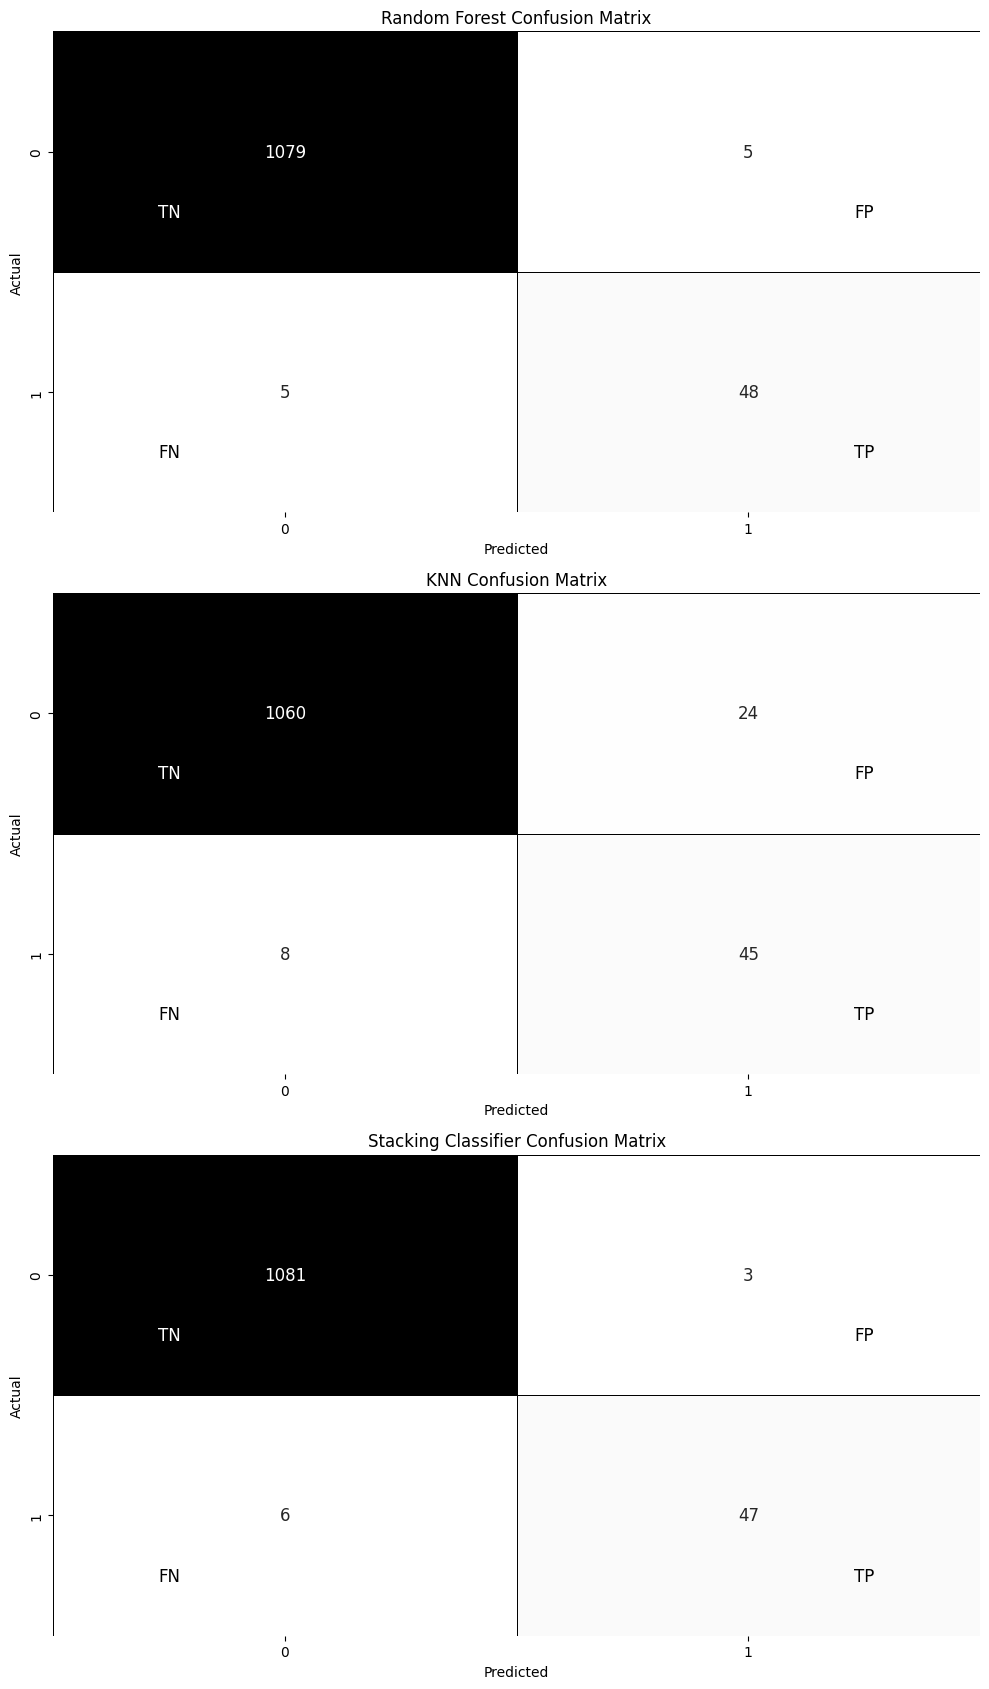

In [ ]:
# Function to annotate confusion matrix
def plot_confusion_matrix(cm, ax, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greys', ax=ax, cbar=False,
                annot_kws={"size": 12}, linewidths=0.5, linecolor='black')
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

    tn, fp, fn, tp = cm.ravel()

    ax.text(0.25, 0.75, f'TN', ha='center', va='center', color='white', fontsize=12)
    ax.text(1.75, 0.75, f'FP', ha='center', va='center', color='black', fontsize=12)
    ax.text(0.25, 1.75, f'FN', ha='center', va='center', color='black', fontsize=12)
    ax.text(1.75, 1.75, f'TP', ha='center', va='center', color='black', fontsize=12)

# Plotting the confusion matrices
fig, axes = plt.subplots(3, 1, figsize=(10, 17))

plot_confusion_matrix(rf_cm, axes[0], 'Random Forest Confusion Matrix')
plot_confusion_matrix(knn_cm, axes[1], 'KNN Confusion Matrix')
plot_confusion_matrix(stacking_cm, axes[2], 'Stacking Classifier Confusion Matrix')

plt.tight_layout()
plt.show()